#### Project Overview: In this Capstone project we are required to build a model that will improve the recommendations given to the users given their past reviews and ratings. So, we need to build a sentiment-based product recommendation ststem. 

###### JEEVAK GHOSH



In [1]:
# Dataframe
import pandas as pd

# Array
import numpy as np
import itertools

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Textpreprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import gensim
from gensim.models import word2vec

# Modelling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,roc_auc_score,precision_score
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import spacy
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [2]:
# import gensim
# import gensim.corpora as corpora
# from gensim.utils import simple_preprocess
# from gensim.models import CoherenceModel


In [3]:
df = pd.read_csv("sample30.csv")
df.head(10)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things...,Not worth it,NaN,NaN,samantha,Negative
6,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-08T00:00:00.000Z,False,False,1,Bought this earlier today and was excited to c...,Disappointing,NaN,NaN,raeanne,Negative
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-21T00:00:00.000Z,False,False,1,I bought this product for my husband and I to ...,Not happy at all,NaN,NaN,kimmie,Negative
8,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-03-28T00:00:00.000Z,False,False,1,My husband and I bought this for some extra fu...,Very disappointing,NaN,NaN,cassie,Negative
9,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-03-21T00:00:00.000Z,False,False,1,Got as a surprise for my husband there is noth...,Don't buy,NaN,NaN,moore222,Positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [5]:
df.shape

(30000, 15)

In [6]:
#to check the count of user sentiment
df['user_sentiment'].value_counts(normalize = True)

Positive    0.887763
Negative    0.112237
Name: user_sentiment, dtype: float64

In [7]:
df['reviews_rating'].value_counts(normalize = True)

5    0.694367
4    0.200667
1    0.046133
3    0.044833
2    0.014000
Name: reviews_rating, dtype: float64

In [8]:
null_counts = df.isnull().sum() * 100 / len(df)
null_counts[null_counts > 0].sort_values(ascending=False)

reviews_userProvince    99.433333
reviews_userCity        93.570000
reviews_didPurchase     46.893333
reviews_doRecommend      8.566667
reviews_title            0.633333
manufacturer             0.470000
reviews_username         0.210000
reviews_date             0.153333
user_sentiment           0.003333
dtype: float64

In [9]:
df['reviews_userProvince'].value_counts(normalize = True)

CA            0.111765
TX            0.094118
OH            0.088235
FL            0.088235
NJ            0.058824
MI            0.047059
AZ            0.029412
NY            0.029412
IN            0.029412
TN            0.023529
CO            0.023529
GA            0.023529
LA            0.023529
WA            0.023529
IL            0.023529
VA            0.023529
NM            0.017647
NC            0.017647
IA            0.017647
KS            0.017647
MO            0.017647
PA            0.017647
DE            0.011765
OR            0.011765
AL            0.011765
HI            0.011765
MT            0.011765
SC            0.011765
Minimeg       0.005882
MA            0.005882
ND            0.005882
ME            0.005882
UT            0.005882
mamad         0.005882
DrJafunkta    0.005882
ID            0.005882
NH            0.005882
PR            0.005882
MD            0.005882
NV            0.005882
WV            0.005882
RI            0.005882
Name: reviews_userProvince, dtype:

In [10]:
df.reviews_userCity.value_counts(dropna=False)

NaN              28071
Chicago             34
Houston             32
New York            29
Los Angeles         26
                 ...  
Chapin               1
Sicklerville         1
Flushing             1
Ft Lauderdale        1
Grand Forks          1
Name: reviews_userCity, Length: 978, dtype: int64

In [11]:
df.reviews_didPurchase.value_counts(dropna=False)

False    14498
NaN      14068
True      1434
Name: reviews_didPurchase, dtype: int64

### Since the null values for reviews_userProvince, reviews_userCity, reviews_didPurchase seem to be pretty high, we can drop them. 

In [12]:
df=df.drop(['reviews_userProvince','reviews_userCity','reviews_didPurchase'], axis=1)
df

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,NaN,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,NaN,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T00:00:00.000Z,True,5,I got this conditioner with Influenster to try...,Softness!!,laurasnchz,Positive
29996,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-27T00:00:00.000Z,True,5,"I love it , I received this for review purpose...",I love it,scarlepadilla,Positive
29997,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,True,5,First of all I love the smell of this product....,Hair is so smooth after use,liviasuexo,Positive
29998,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-11T00:00:00.000Z,True,5,I received this through Influenster and will n...,Perfect for my oily hair!,ktreed95,Positive


In [13]:
null_counts = df.isnull().sum() * 100 / len(df)
null_counts[null_counts > 0].sort_values(ascending=False)

reviews_doRecommend    8.566667
reviews_title          0.633333
manufacturer           0.470000
reviews_username       0.210000
reviews_date           0.153333
user_sentiment         0.003333
dtype: float64

In [14]:
#to impute the value of reviewsdorecommend with either True or false based on the review rating
conditions = [df['reviews_rating'] < 2, df['reviews_rating'] > 2]
values = ['True', 'False']

# apply logic where reviews_doRecommend is null
df['reviews_doRecommend'] = np.where(df['reviews_doRecommend'].isnull(),
                              np.select(conditions, values),
                              df['reviews_doRecommend'])

In [15]:
null_counts = df.isnull().sum() * 100 / len(df)
null_counts[null_counts > 0].sort_values(ascending=False)

reviews_title       0.633333
manufacturer        0.470000
reviews_username    0.210000
reviews_date        0.153333
user_sentiment      0.003333
dtype: float64

### Since the reviews_title, manufacturer, reviews_username & reviews_date are a small amount of missing data and it would be hard to impute these values here, we can drop the null values. 

In [16]:
df1 = df.dropna()

In [17]:
df1.isnull().sum() * 100 / len(df1)

id                     0.0
brand                  0.0
categories             0.0
manufacturer           0.0
name                   0.0
reviews_date           0.0
reviews_doRecommend    0.0
reviews_rating         0.0
reviews_text           0.0
reviews_title          0.0
reviews_username       0.0
user_sentiment         0.0
dtype: float64

In [18]:
df1.shape

(29566, 12)

In [19]:
#to check the total unique values in the dataset.
print(df.nunique())

id                       271
brand                    214
categories               270
manufacturer             227
name                     271
reviews_date            6857
reviews_doRecommend        5
reviews_rating             5
reviews_text           27282
reviews_title          18535
reviews_username       24914
user_sentiment             2
dtype: int64


In [20]:
### Here we can see that the text 

In [21]:
df1.head(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,False,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,False,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,False,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative


### As we can see that there are no more null values so we can go ahead and do a bit more EDA to understand the data better. 

Text(0, 0.5, 'Total Reviews')

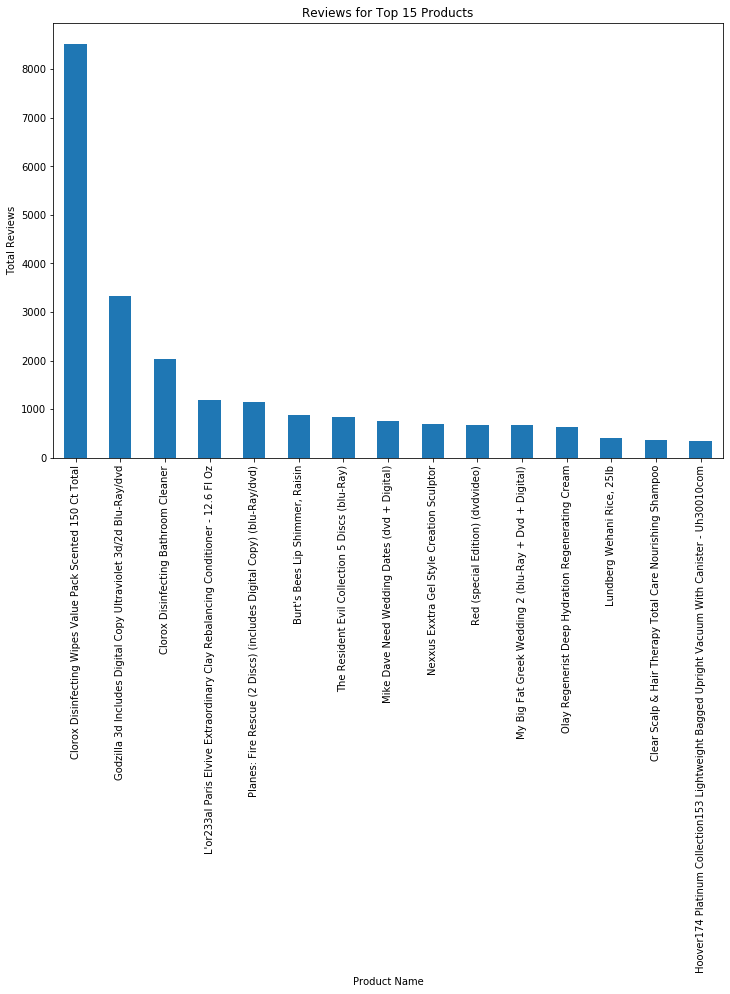

In [22]:
#to plot the number of reviews for the top 15 products
products = df1["name"].value_counts()
plt.figure(figsize=(12,8))
products[:15].plot(kind='bar')
plt.title("Reviews for Top 15 Products")
plt.xlabel('Product Name')
plt.ylabel('Total Reviews')

Text(0, 0.5, 'Total Reviews')

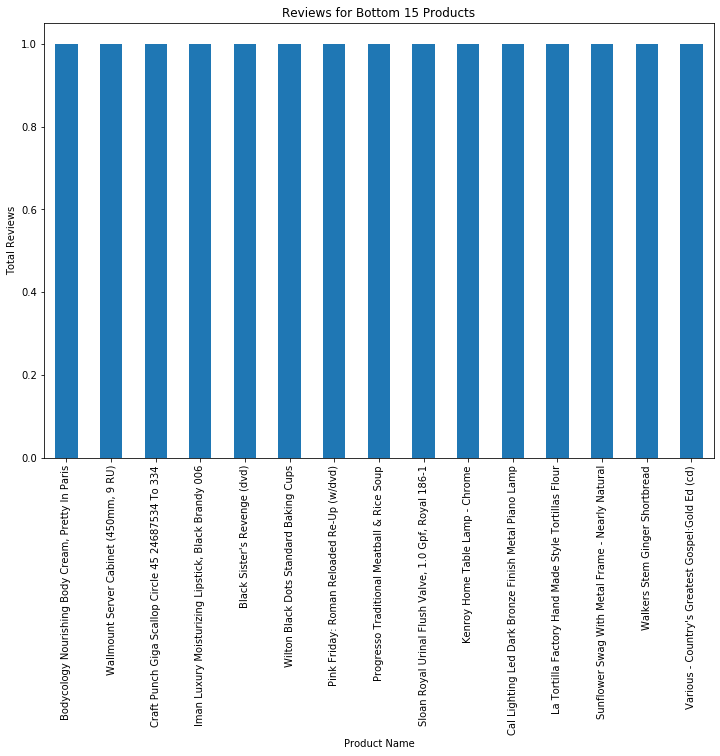

In [23]:
#to plot the number of reviews for the bottom 15 products
products = df1["name"].value_counts()
plt.figure(figsize=(12,8))
products[-15:].plot(kind='bar')
plt.title("Reviews for Bottom 15 Products")
plt.xlabel('Product Name')
plt.ylabel('Total Reviews')

Text(0, 0.5, 'Total Reviews')

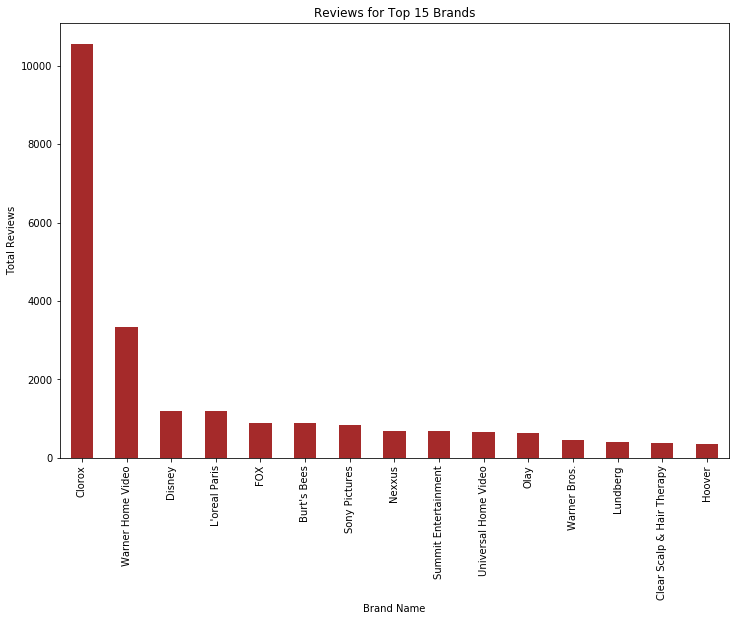

In [24]:
#to plot the number of reviews for the top 15 brands
brands = df1["brand"].value_counts()
plt.figure(figsize=(12,8))
brands[:15].plot(kind='bar' , color="brown")
plt.title("Reviews for Top 15 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Total Reviews')

Text(0, 0.5, 'Total Reviews')

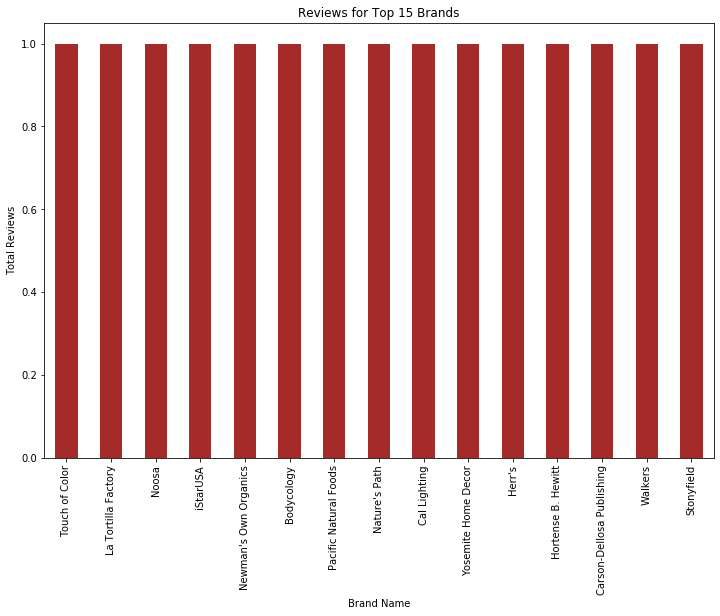

In [25]:
#to plot the number of reviews for the top 15 brands
brands = df1["brand"].value_counts()
plt.figure(figsize=(12,8))
brands[-15:].plot(kind='bar' , color="brown")
plt.title("Reviews for Top 15 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Total Reviews')

In [26]:
#to check brand feedback
brand_feedback = df1[(df1['brand']=="Clorox")& (df1['reviews_rating']<3)]
brand_feedback

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
6479,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2012-01-26T13:31:39.000Z,True,1,"This is an outstanding product, it not only cl...",Fresh Smell,barsea,Positive
6480,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-08-15T15:47:17.000Z,True,1,I have been an avid user of Clorox Wipes for m...,Smell,sofia50,Positive
6481,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-03-29T07:41:03.000Z,True,1,I have used Clorox Wipes for years... Cannot l...,Who Changed The Scent??,renee65,Positive
6482,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-03-26T00:03:29.000Z,True,1,I use Clorox wipes fanatically all over my hom...,New Product Stinks,angi677,Positive
6483,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-01-01T00:00:00.000Z,True,1,"Being a mom of three, disinfecting the home ha...",Germ free,brandy33,Positive
6484,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2017-07-06T22:27:33.000Z,True,1,"LOVE Clorox wipes, but this batch is horrible....",Horrible Sheets,ash23,Positive
6485,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-01-24T02:24:57.000Z,True,1,I normally buy Clorox brand disinfecting wipes...,New Scent Stinks,katie80,Positive
6486,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-04-01T00:00:00.000Z,False,1,Please go back to original scent/formula!! The...,Please Change Back To Original Lemon Scent/For...,mamaal,Negative
6487,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-08-20T00:00:00.000Z,False,1,I would give ZERO stars to the New Formula Clo...,New formula makes my hands burn! Go back to th...,jlynn,Positive
6488,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2016-10-24T00:00:00.000Z,False,1,These are the most frustrating and useless wip...,Useless,bowie3,Negative


Text(0, 0.5, 'Total Reviews')

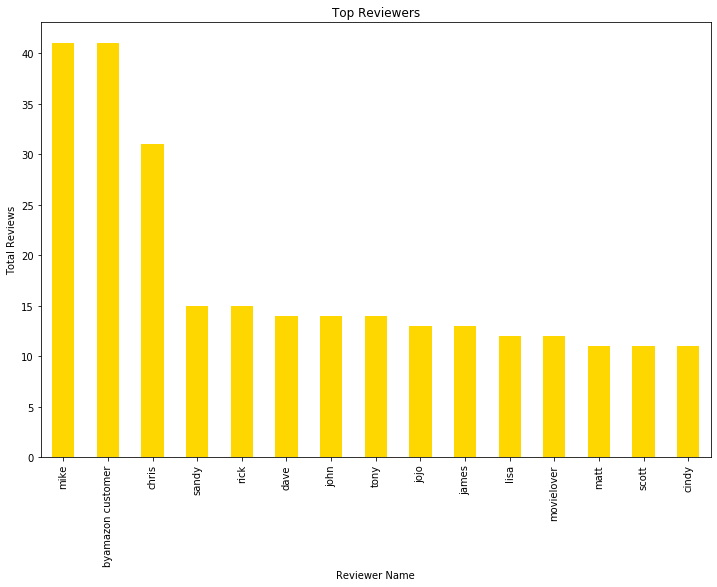

In [27]:
#To identify the top reviewers
user_count=df1['reviews_username'].value_counts()
plt.figure(figsize=(12,8))
user_count[:15].plot(kind='bar' , color="gold")
plt.title("Top Reviewers")
plt.xlabel('Reviewer Name')
plt.ylabel('Total Reviews')

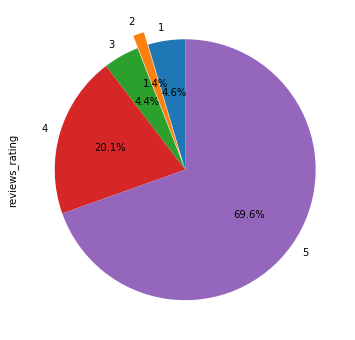

In [28]:
# Total numbers of ratings 
%matplotlib inline
plt.figure(figsize = (10,6))

df1.groupby('reviews_rating').reviews_rating.count()
df1.groupby('reviews_rating').reviews_rating.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

#### We can see here that most of the reviews have been 5 star. So, overall the sentiment is highly positive for the products. 

In [29]:
Segment = df1.groupby(['brand','name'])
ratings_by_segment=Segment['reviews_rating'].mean().to_frame(name = 'OR').reset_index()
ratings_by_segment

,brand,name,OR
0,4C Foods,4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5.000000
1,AMBI,Ambi Complexion Cleansing Bar,4.750000
2,ANCHOR BAY,Leslie Sansone:Belly Blasting Walk (dvd),4.766667
3,Africa's Best,Africa's Best No-Lye Dual Conditioning Relaxer...,4.166667
4,Alberto VO5,Alberto VO5 Salon Series Smooth Plus Sleek Sha...,5.000000
...,...,...,...
244,Windex,Windex Original Glass Cleaner Refill 67.6oz (2...,4.129310
245,Yes to Carrots,Yes To Carrots Nourishing Body Wash,4.650794
246,Yes to Grapefruit,Yes To Grapefruit Rejuvenating Body Wash,3.846154
247,Yosemite Home Decor,Pocket Watch Wall Clock Distressed Black - Yos...,1.000000


In [30]:
ratings_by_segment=ratings_by_segment.sort_values(by ='OR', ascending = True)
low_OR=ratings_by_segment.head(20)
high_OR=ratings_by_segment.tail(20)

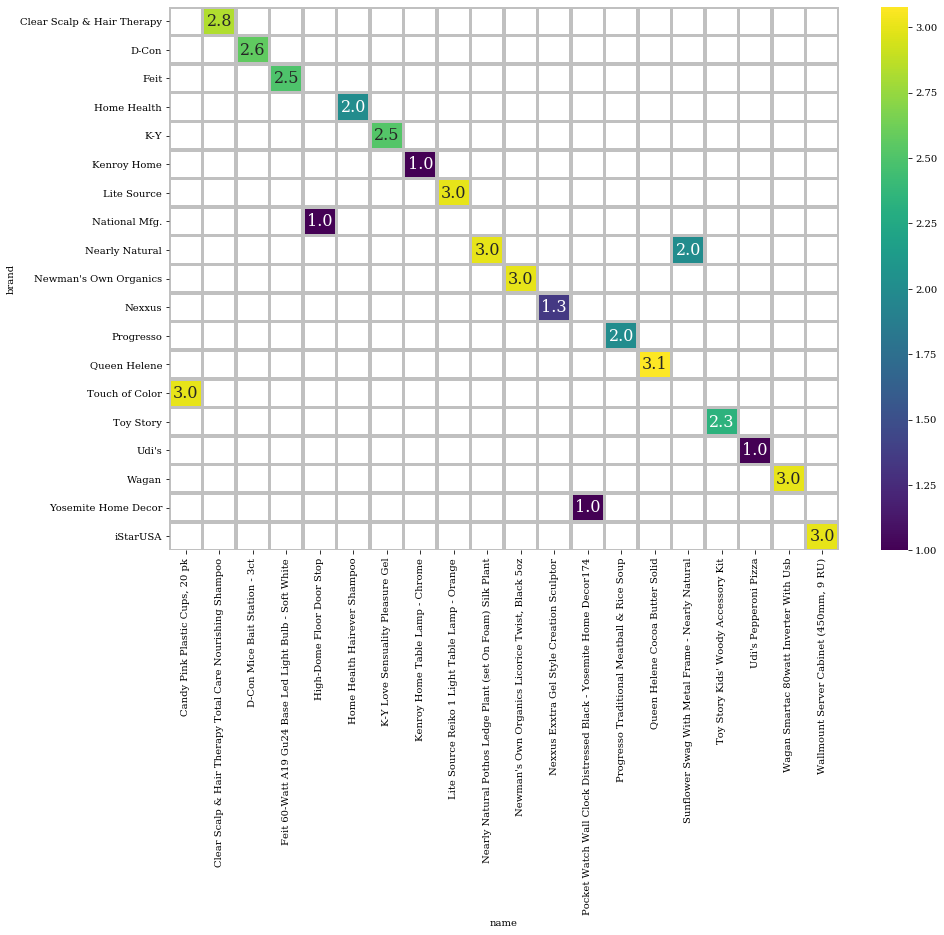

In [31]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.family'] = "serif"
fin = pd.pivot_table(data=low_OR, index="brand", columns="name", values="OR")
sns.heatmap(fin, annot=True,cmap='viridis',linewidths=2.5, linecolor='silver', robust=True,fmt=".1f",annot_kws={'size':16})
plt.show()

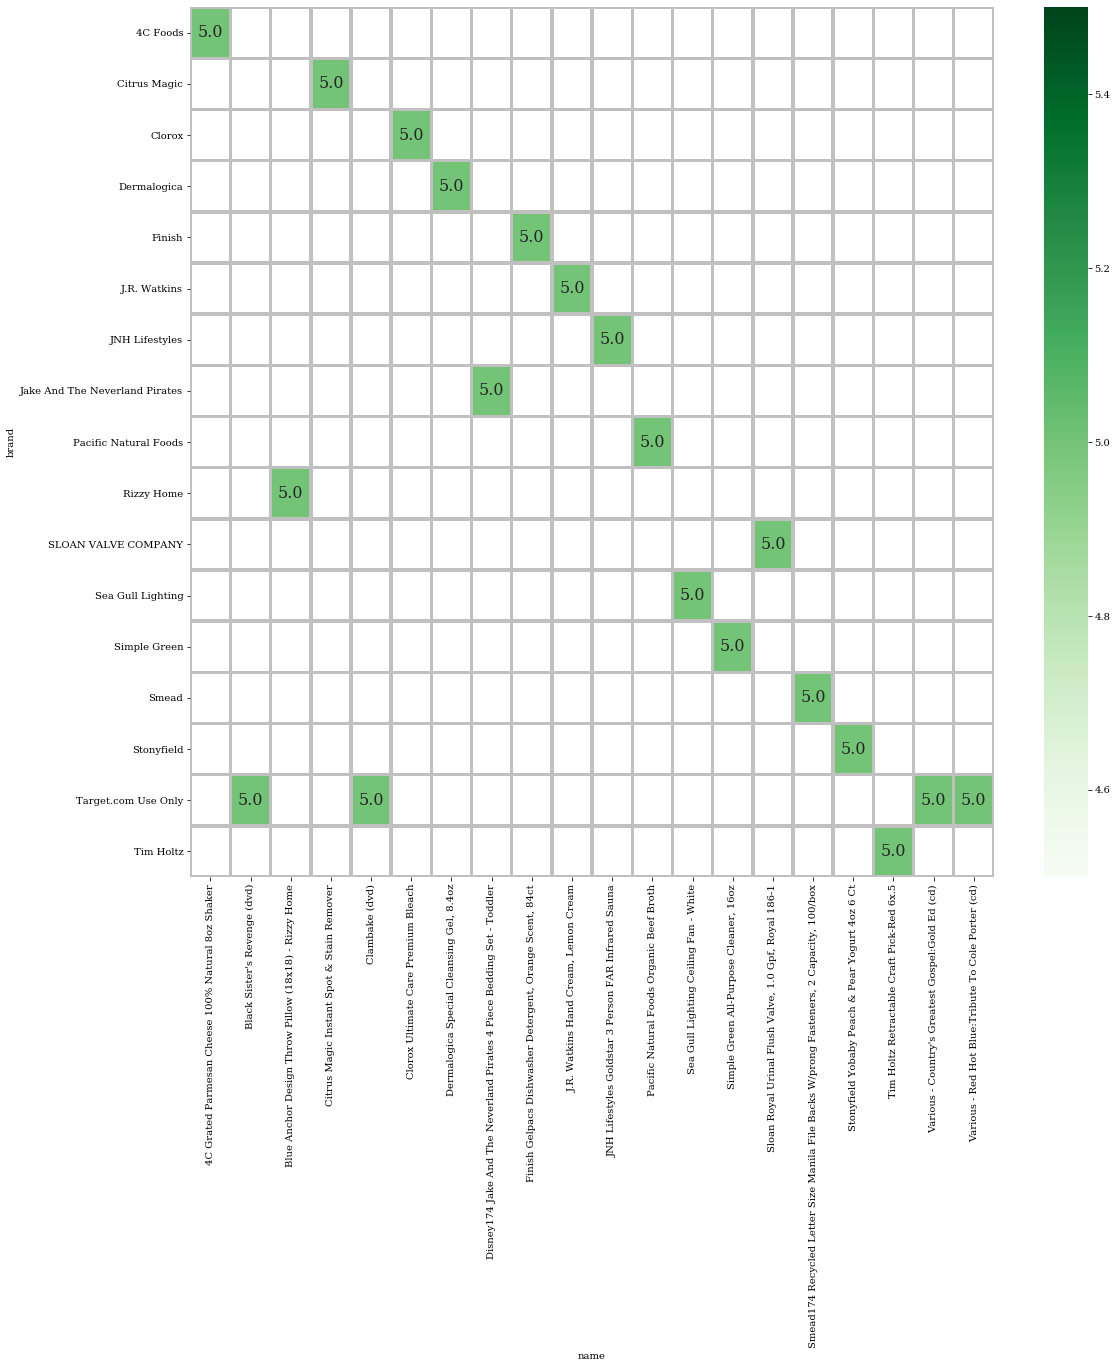

In [32]:
plt.rcParams['figure.figsize'] = (18, 16.0)
plt.rcParams['font.family'] = "serif"
fin = pd.pivot_table(data=high_OR, index="brand", columns="name", values="OR")
sns.heatmap(fin, annot=True,cmap='Greens',linewidths=2.5, linecolor='silver', robust=True,fmt=".1f",annot_kws={'size':16})
plt.show()

### From the above we can reasonably infer the brands and the products that have good & bad reviews.

In [33]:
# Create a "year" column and drop time column
from datetime import datetime
df1.head(3)

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,False,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,False,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,False,5,Good flavor.,Good,dorothy w,Positive


In [34]:
#to store the year
new = df1["reviews_date"].str.split("-", n = 1, expand = True)
df1["reviews_date"]= new[0]
df1.head(3)

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012,False,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017,False,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017,False,5,Good flavor.,Good,dorothy w,Positive


In [35]:
#to check the unique values in the reviewdate
df1.reviews_date.unique()

array(['2012', '2017', '2016', '2015', '2011', '2014', '2009', '2010',
       '2013', '2018', '2008', '2007',
       ' hooks slide or swivel into any desired position."'], dtype=object)

### The value 'hooks slide or swivel into any desired position' seems like an incompatible value here and needs to be deleted.

In [36]:
print(df1.shape)
df1 = df1.drop(df1[df1['reviews_date'] == ' hooks slide or swivel into any desired position."'].index)
df1.shape

(29566, 12)


(29558, 12)

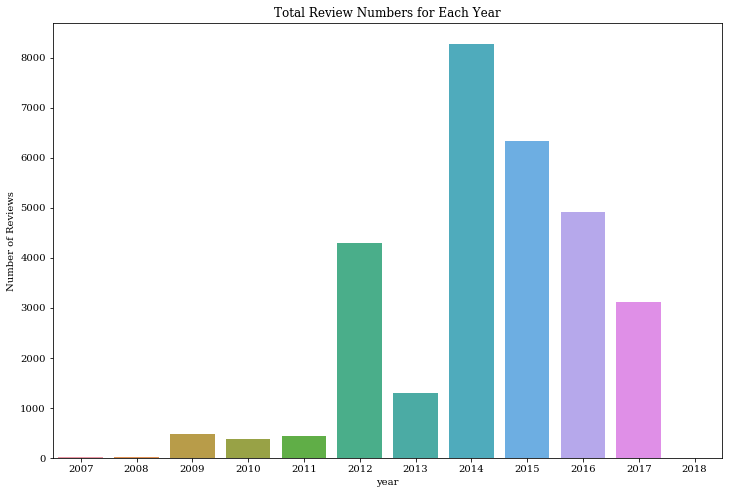

2014    8278
2015    6328
2016    4922
2012    4284
2017    3121
2013    1291
2009     480
2011     444
2010     375
2008      22
2007      10
2018       3
Name: reviews_date, dtype: int64

In [37]:
#total review yearwise
plt.figure(figsize = (12,8))
sns.countplot(df1['reviews_date'])
plt.title('Total Review Numbers for Each Year')
plt.xlabel('year')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df1['reviews_date'].value_counts()

### It can be seen here that the year 2014 had the highest peak in terms of reviews, post that it has been on a downward trend. 

In [38]:
print('Number of unique reviewers: {}'.format(len(df1['reviews_username'].unique())))

Number of unique reviewers: 24624


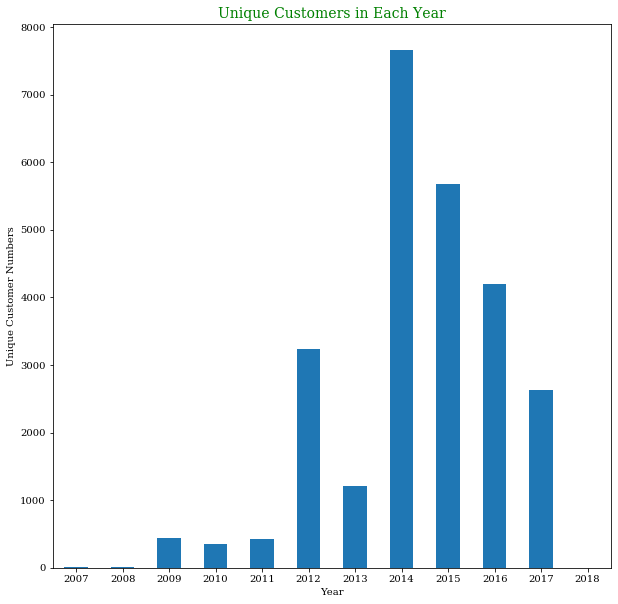

reviews_date
2007      10
2008      18
2009     446
2010     350
2011     432
2012    3230
2013    1211
2014    7659
2015    5681
2016    4200
2017    2636
2018       3
Name: reviews_username, dtype: int64


In [39]:
#to check unique reviewers every year
unique_cust = df1.groupby('reviews_date')['reviews_username'].nunique()

# Plot unique customer numbers in each year
plt.figure(figsize = (10,10))
unique_cust.plot(kind='bar', rot = 0)
plt.title('Unique Customers in Each Year', color='g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Customer Numbers')
plt.show()

# Print unique customer numbers in each year
print(unique_cust)

In [40]:
# unique customers for each "sentiment"
a = list(df1.groupby(['user_sentiment'])['reviews_username'].unique())  

# number of customers
a2 = [len(a[0]),len(a[1])] 

# number of reviews for each "sentiment"
b = list(df1['user_sentiment'].value_counts())              

uniq_cust_rate = pd.DataFrame({'user_sentiment': ['Negative', 'Positive'],
                               'number_of_customers': a2,
                               'number_of_reviews': sorted(b)})
print(uniq_cust_rate)

  user_sentiment  number_of_customers  number_of_reviews
0       Negative                 2920               3304
1       Positive                22021              26254


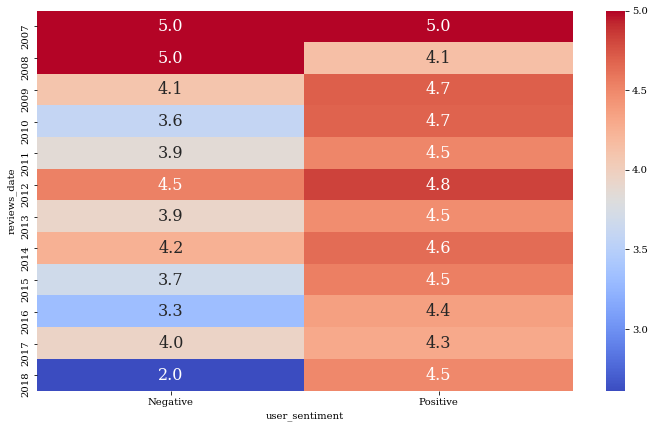

In [41]:
plt.rcParams['figure.figsize'] = (12.0, 7.0)
plt.rcParams['font.family'] = "serif"
fin = pd.pivot_table(data=df1, index="reviews_date", columns="user_sentiment", values="reviews_rating")
sns.heatmap(fin, annot=True,cmap='coolwarm', robust=True,fmt=".1f",annot_kws={'size':16})
plt.show()

##### This sort of shows us that there is some disparity in the sentiments. As there are ratings like 5, 4.5, 4 which are pretty high ratings, but they have been categorised as Negative sentiments. 
##### Also, it can be seen here that the negative sentiments vary from 2 to 5 ratings while positive sentiments are all above 4. The Negative sentiments does look dicey based on this data.

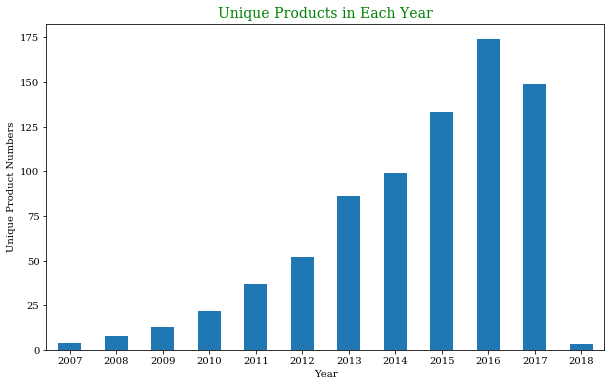

reviews_date
2007      4
2008      8
2009     13
2010     22
2011     37
2012     52
2013     86
2014     99
2015    133
2016    174
2017    149
2018      3
Name: id, dtype: int64


In [42]:
# How many unique products in each year?
unique_prod = df1.groupby('reviews_date')['id'].nunique()

# Plot unique product numbers in each year
plt.figure(figsize = (10,6))
unique_prod.plot(kind='bar', rot =0)
plt.title('Unique Products in Each Year', color = 'g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Product Numbers')
plt.show()

# Print unique product numbers in each year
print(unique_prod)

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29558 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29558 non-null  object
 1   brand                29558 non-null  object
 2   categories           29558 non-null  object
 3   manufacturer         29558 non-null  object
 4   name                 29558 non-null  object
 5   reviews_date         29558 non-null  object
 6   reviews_doRecommend  29558 non-null  object
 7   reviews_rating       29558 non-null  int64 
 8   reviews_text         29558 non-null  object
 9   reviews_title        29558 non-null  object
 10  reviews_username     29558 non-null  object
 11  user_sentiment       29558 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.2+ MB


#### We can see here that the unique products has been the highest for year 2016. It has been increasing over the years with the exception of 2017. 

#### We can move forward with text pre-processing, considering all the EDA done.

### TEXT PREPROCESSING

The text preprocessing is carried out to clean the raw reviews so that it can be used for feature extraction. 
Under this we would do the following:

1) Expand contractions

2) Remove special characters

3) Convert all cahracters to lowercase

4) Remove punctuation 

5) Replace all numbers with words

6) Remove stopwords

7) Stemming

8) Lemmatization

In [44]:
df1.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012,False,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017,False,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive


In [45]:
df1['review'] = df1['reviews_title'] +' '+  df1['reviews_text']
df1=df1.drop(['reviews_title','reviews_text'], axis = 1)

In [46]:
import contractions
import re, unicodedata

#to expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = PorterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word,'v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

In [47]:
def normalize_and_lemmatize(input):
    sample = expand_contractions(input)
    sample = remove_special_characters(sample)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    stem = stem_words(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [48]:
df1['clean_text'] = df1['review'].map(lambda text: normalize_and_lemmatize(text))

In [49]:
df1.head(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,review,clean_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012,False,5,joshua,Positive,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017,False,5,dorothy w,Positive,Good Good flavor. This review was collected as...,good good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017,False,5,dorothy w,Positive,Good Good flavor.,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016,False,1,rebecca,Negative,Disappointed I read through the reviews on her...,disappoint read review look buy one couple lub...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016,False,1,walker557,Negative,Irritation My husband bought this gel for us. ...,irritation husband buy gel us gel cause irrita...


In [50]:
#to change the user sentiment to numbers
dict_gender = {'Positive': 1, 'Negative': 0}
df1.replace({'user_sentiment': dict_gender}, inplace = True)
df1.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,review,clean_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012,False,5,joshua,1,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017,False,5,dorothy w,1,Good Good flavor. This review was collected as...,good good flavor review collect part promotion


In [51]:
reviews_df=df1[["clean_text", "user_sentiment"]]
reviews_df.head()

,clean_text,user_sentiment
0,awesome love album good hip hop side current p...,1
1,good good flavor review collect part promotion,1
2,good good flavor,1
3,disappoint read review look buy one couple lub...,0
4,irritation husband buy gel us gel cause irrita...,0


### Feature Engineering & Selection

We will implement Count Vectorizer, TF-IDF methods along with sampling techniques. The data in our case is imbalanced, so we need to create multiple models and carry out the analysis based on unsampled data & then do oversampling using SMOTE and create a different model. We need to consider metrics like precision, recall & f1 score more than the accuracy to evaluate our model performance. 

In [52]:
#to create a model using TF-IDF
tvec = TfidfVectorizer()
tvec.fit(reviews_df['clean_text'])
txt = tvec.transform(reviews_df['clean_text'])

In [53]:
txt.shape

(29558, 17462)

In [54]:
#to split the data
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(txt, reviews_df['user_sentiment'], test_size=0.3)

In [55]:
#to do oversampling with SMOTE

print("Before Oversampling, total count of 'positive' label : {}".format(sum(y_train_tf == 1)))
print("Before Oversampling, total count of 'negative' label : {} \n".format(sum(y_train_tf == 0)))

sm = SMOTE(random_state = 0)
X_train_smt, y_train_smt = sm.fit_resample(X_train_tf, y_train_tf)
  
print('After Oversampling, shape of train_X: {}'.format(X_train_smt.shape))
print('After Oversampling, shape of train_y: {} \n'.format(y_train_smt.shape))
  
print("After OverSampling, total count of 'positive' label : {}".format(sum(y_train_smt == 1)))
print("After OverSampling, total count of 'negative' label : {}".format(sum(y_train_smt == 0)))

Before Oversampling, total count of 'positive' label : 18387
Before Oversampling, total count of 'negative' label : 2303 

After Oversampling, shape of train_X: (36774, 17462)
After Oversampling, shape of train_y: (36774,) 

After OverSampling, total count of 'positive' label : 18387
After OverSampling, total count of 'negative' label : 18387


In [56]:
# # With best parameters
# lr = LogisticRegression(C=10, penalty='l2', n_jobs=-1)
# lr.fit(X_train_res, y_train_res)
# lr_prediction = lr.predict(X_test_tf)

# print(classification_report(y_test_tf, lr_prediction))

In [57]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [58]:
#to plot a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 12)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 12)
    plt.yticks(tick_marks, classes, fontsize = 12)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 20)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 15)
    plt.xlabel('Predicted Label', fontsize = 15)

    return plt

In [59]:
#to display confusion matrix with CountVectorizer
def disp_confusion_matrix(y_pred, model_name, vector = 'TFIDF'):
    cm = confusion_matrix(y_test_tf, y_pred)
    fig = plt.figure(figsize=(6, 8))
    plot = plot_confusion_matrix(cm, classes=['Negative','Positive'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

In [60]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)


### MODEL BUILDING

##### USING Logistic regression

In [61]:
#to model on actual data
log_model=LogisticRegression()

params={'C':np.logspace(-10, 1, 15, 100),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train_tf, y_train_tf)
clf_LR.best_estimator_
y_pred=clf_LR.predict(X_test_tf)

In [62]:
#to print the classification report
test_eval(clf_LR, X_test_tf, y_test_tf, 'Logistic Regression', 'actual')


Classification Report
              precision    recall  f1-score   support

           0       0.44      0.81      0.57      1001
           1       0.97      0.87      0.92      7867

    accuracy                           0.86      8868
   macro avg       0.70      0.84      0.74      8868
weighted avg       0.91      0.86      0.88      8868
 

AUC-ROC
0.9226859323465398


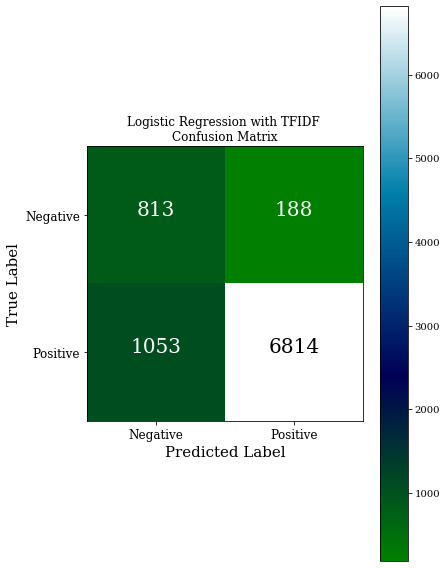

In [63]:
#to display the confusion matrix
disp_confusion_matrix(y_pred, "Logistic Regression")

In [64]:
#to build the model after oversampling

log_model=LogisticRegression()

params={'C':np.logspace(-10, 1, 15, 100),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR1 = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR1.fit(X_train_smt, y_train_smt)
clf_LR1.best_estimator_
y_pred=clf_LR1.predict(X_test_tf)

In [65]:
#to print the classification report
test_eval(clf_LR1, X_test_tf, y_test_tf, 'Logistic Regression', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.48      0.71      0.58      1001
           1       0.96      0.90      0.93      7867

    accuracy                           0.88      8868
   macro avg       0.72      0.81      0.75      8868
weighted avg       0.91      0.88      0.89      8868
 

AUC-ROC
0.9104610909619172


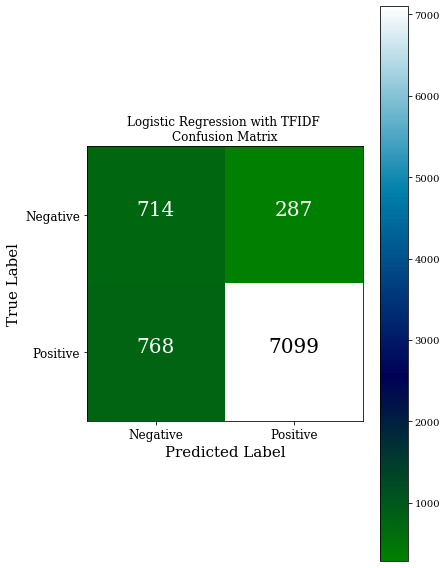

In [66]:
#to display the confusion matrix
disp_confusion_matrix(y_pred, "Logistic Regression")

###### Using Random Forest

In [67]:
#Unsampled Data
rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(X_train_tf, y_train_tf)
y_pred = rfc.predict(X_test_tf)

In [68]:
test_eval(rfc, X_test_tf, y_test_tf, 'Random Forest', 'actual')

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.17      0.29      1001
           1       0.90      1.00      0.95      7867

    accuracy                           0.91      8868
   macro avg       0.92      0.59      0.62      8868
weighted avg       0.91      0.91      0.88      8868
 

AUC-ROC
0.8766131542285096


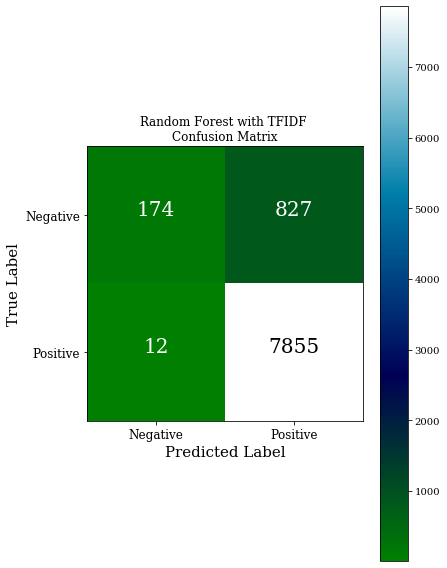

In [69]:
disp_confusion_matrix(y_pred, "Random Forest")

In [70]:
#to use the data after oversampling
rfc_smt = RandomForestClassifier(n_jobs=-1)
rfc_smt.fit(X_train_smt, y_train_smt)
y_pred = rfc_smt.predict(X_test_tf)

In [71]:
test_eval(rfc_smt, X_test_tf, y_test_tf, 'Random Forest', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.59      0.37      0.45      1001
           1       0.92      0.97      0.94      7867

    accuracy                           0.90      8868
   macro avg       0.76      0.67      0.70      8868
weighted avg       0.89      0.90      0.89      8868
 

AUC-ROC
0.8591014299035146


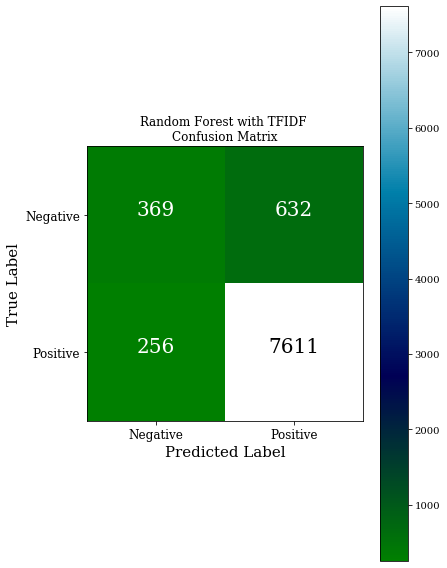

In [72]:
disp_confusion_matrix(y_pred, "Random Forest")

###### USING XGBoost

In [73]:
#to run the model with actual data
xgb = XGBClassifier(n_jobs=-1)
xgb.fit(X_train_tf, y_train_tf)
y_pred = xgb.predict(X_test_tf)

In [74]:
test_eval(xgb, X_test_tf, y_test_tf, 'XGBOOST', 'actual')

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.37      0.51      1001
           1       0.93      0.99      0.96      7867

    accuracy                           0.92      8868
   macro avg       0.85      0.68      0.73      8868
weighted avg       0.91      0.92      0.90      8868
 

AUC-ROC
0.9161859495531797


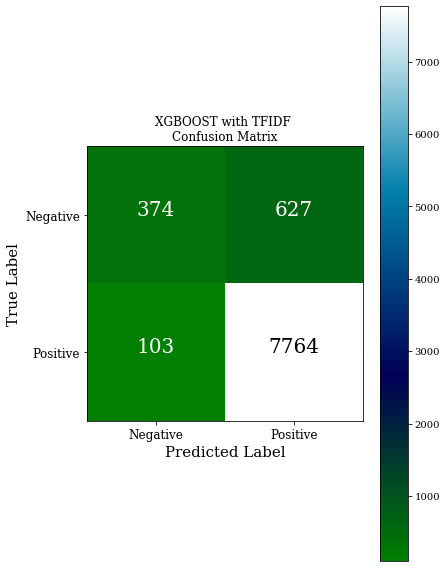

In [75]:
disp_confusion_matrix(y_pred, "XGBOOST")

In [76]:
#to run the model with oversampled data
xgb2 = XGBClassifier(n_jobs=-1)
xgb2.fit(X_train_smt, y_train_smt)
y_pred = xgb2.predict(X_test_tf)

In [77]:
test_eval(xgb2, X_test_tf, y_test_tf, 'XGBOOST', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.52      0.59      0.55      1001
           1       0.95      0.93      0.94      7867

    accuracy                           0.89      8868
   macro avg       0.73      0.76      0.74      8868
weighted avg       0.90      0.89      0.89      8868
 

AUC-ROC
0.8993744275300141


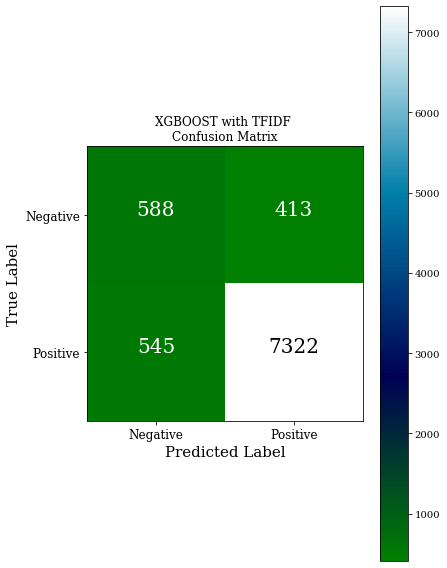

In [78]:
disp_confusion_matrix(y_pred, "XGBOOST")

In [79]:
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [80]:
clf_eval_df

,model,resample,precision,recall,f1-score,AUC-ROC
0,Logistic Regression,actual,0.973151,0.866150,0.916538,0.922686
1,Logistic Regression,smote,0.961143,0.902377,0.930833,0.910461
2,Random Forest,actual,0.904745,0.998475,0.949302,0.876613
3,Random Forest,smote,0.923329,0.967459,0.944879,0.859101
4,XGBOOST,actual,0.925277,0.986907,0.955099,0.916186
5,XGBOOST,smote,0.946606,0.930723,0.938598,0.899374


##### We can see here that the model with unsampled data (actual) of both Logistic Regression & XGBoost are pretty high. But the problem with unsampled data is that the models seem to be biased and most of the models has pretty low scores for the negative sentiment. So, while considering our model, we would like to select a model whose data is bit balanced. 

#### And going by that, the model of Logistic regression after SMOTE seems to be the ideal choice. 



##### Let us now use the Bag of words model to see if the model could be made better.


### COUNTVECTORIZER

In [81]:
#CountVectorizer Bag of Words to create the word vector
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect.fit(reviews_df['clean_text'])
txt2 = count_vect.transform(reviews_df['clean_text'])

In [82]:
txt2.shape

(29558, 17462)

In [83]:
X_train_cou, X_test_cou, y_train_cou, y_test_cou = train_test_split(txt2, reviews_df['user_sentiment'], test_size=0.3)

In [84]:
print("Before OverSampling, counts of label 'positive': {}".format(sum(y_train_cou == 1)))
print("Before OverSampling, counts of label 'negative': {} \n".format(sum(y_train_cou == 0)))

sm = SMOTE(random_state = 0)
X_train_smt2, y_train_smt2 = sm.fit_resample(X_train_cou, y_train_cou)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_smt2.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smt2.shape))
  
print("After OverSampling, counts of label 'positive': {}".format(sum(y_train_smt2 == 1)))
print("After OverSampling, counts of label 'negative': {}".format(sum(y_train_smt2 == 0)))

Before OverSampling, counts of label 'positive': 18350
Before OverSampling, counts of label 'negative': 2340 

After OverSampling, the shape of train_X: (36700, 17462)
After OverSampling, the shape of train_y: (36700,) 

After OverSampling, counts of label 'positive': 18350
After OverSampling, counts of label 'negative': 18350


In [85]:
def disp_confusion_matrix2(y_pred, model_name, vector = 'CounterVectorizing'):
    cm = confusion_matrix(y_test_cou, y_pred)
    fig = plt.figure(figsize=(6, 8))
    plot = plot_confusion_matrix(cm, classes=['Negative','Positive'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

###### USING LOGISTIC REGRESSION

In [86]:
log_model=LogisticRegression()

params={'C':np.logspace(-10, 1, 15, 10, 20),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

cv = StratifiedKFold(n_splits=8, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR3 = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR3.fit(X_train_cou, y_train_cou)
# clf_LR.best_estimator_
y_pred=clf_LR3.predict(X_test_cou)

In [87]:
test_eval(clf_LR3, X_test_cou, y_test_cou, 'Logistic Regression', 'actual')

Classification Report
              precision    recall  f1-score   support

           0       0.43      0.82      0.56       964
           1       0.97      0.87      0.92      7904

    accuracy                           0.86      8868
   macro avg       0.70      0.84      0.74      8868
weighted avg       0.92      0.86      0.88      8868
 

AUC-ROC
0.9232164343491188


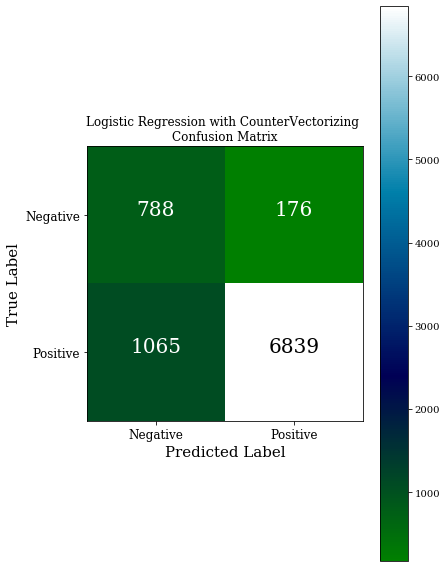

In [88]:
disp_confusion_matrix2(y_pred, "Logistic Regression")

In [89]:
#After oversampling

log_model=LogisticRegression()

params={'C':np.logspace(-10, 1, 15, 10, 20),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

cv = StratifiedKFold(n_splits=8, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR4 = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=1)
clf_LR4.fit(X_train_smt2, y_train_smt2)
y_pred=clf_LR4.predict(X_test_cou)

In [90]:
test_eval(clf_LR4, X_test_cou, y_test_cou, 'Logistic Regression', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.52      0.63      0.57       964
           1       0.95      0.93      0.94      7904

    accuracy                           0.90      8868
   macro avg       0.73      0.78      0.75      8868
weighted avg       0.91      0.90      0.90      8868
 

AUC-ROC
0.896423576696289


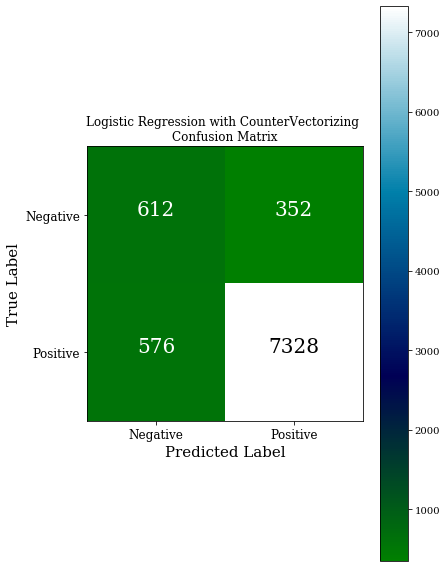

In [91]:
disp_confusion_matrix2(y_pred, "Logistic Regression")

##### USING RANDOM FOREST

In [92]:
rfc3 = RandomForestClassifier(n_jobs=-1)
rfc3.fit(X_train_cou, y_train_cou)
y_pred = rfc3.predict(X_test_cou)

In [93]:
test_eval(rfc3, X_test_cou, y_test_cou, 'Random Forest', 'actual')

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.20      0.32       964
           1       0.91      1.00      0.95      7904

    accuracy                           0.91      8868
   macro avg       0.91      0.60      0.64      8868
weighted avg       0.91      0.91      0.88      8868
 

AUC-ROC
0.8814461294874595


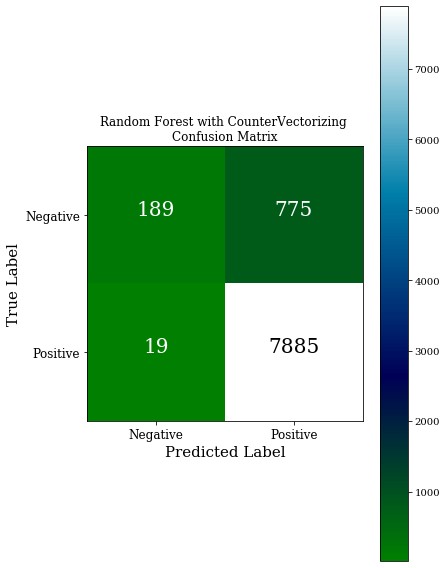

In [94]:
disp_confusion_matrix2(y_pred, "Random Forest")

In [95]:
#to work with data after oversampling
rfc4 = RandomForestClassifier(n_jobs=-1)
rfc4.fit(X_train_smt2, y_train_smt2)
y_pred = rfc4.predict(X_test_cou)

In [96]:
test_eval(rfc4, X_test_cou, y_test_cou, 'Random Forest', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.51      0.50      0.51       964
           1       0.94      0.94      0.94      7904

    accuracy                           0.89      8868
   macro avg       0.73      0.72      0.72      8868
weighted avg       0.89      0.89      0.89      8868
 

AUC-ROC
0.8815236284585146


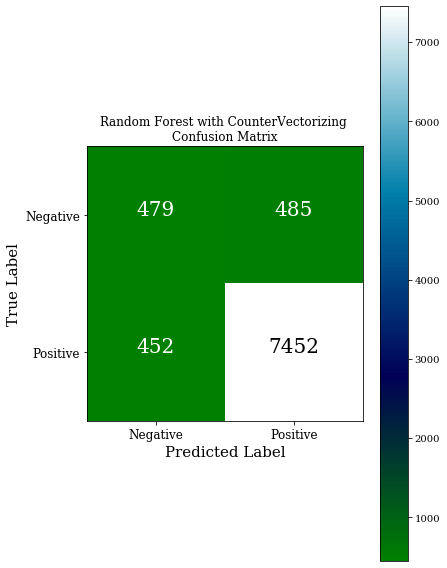

In [97]:
disp_confusion_matrix2(y_pred, "Random Forest")

###### USING XGBOOST

In [98]:
#to run the model with actual data
xgb = XGBClassifier(n_jobs=-1)
xgb.fit(X_train_cou, y_train_cou)
y_pred = xgb.predict(X_test_cou)

In [99]:
test_eval(xgb, X_test_cou, y_test_cou, 'XGBOOST', 'actual')

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.38      0.50       964
           1       0.93      0.98      0.96      7904

    accuracy                           0.92      8868
   macro avg       0.83      0.68      0.73      8868
weighted avg       0.91      0.92      0.91      8868
 

AUC-ROC
0.9164513188343104


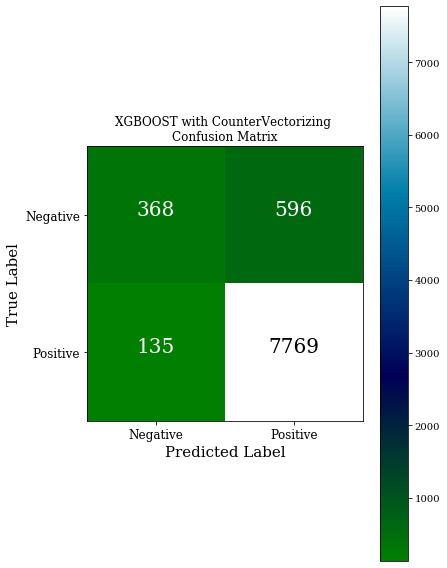

In [100]:
disp_confusion_matrix2(y_pred, "XGBOOST")

In [101]:
#to build model from oversampled data
xgb2 = XGBClassifier(n_jobs=-1)
xgb2.fit(X_train_smt, y_train_smt)
y_pred = xgb.predict(X_test_cou)

In [102]:
test_eval(xgb2, X_test_cou, y_test_cou, 'XGBOOST', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.38      0.50       964
           1       0.93      0.98      0.96      7904

    accuracy                           0.92      8868
   macro avg       0.83      0.68      0.73      8868
weighted avg       0.91      0.92      0.91      8868
 

AUC-ROC
0.8626270694390781


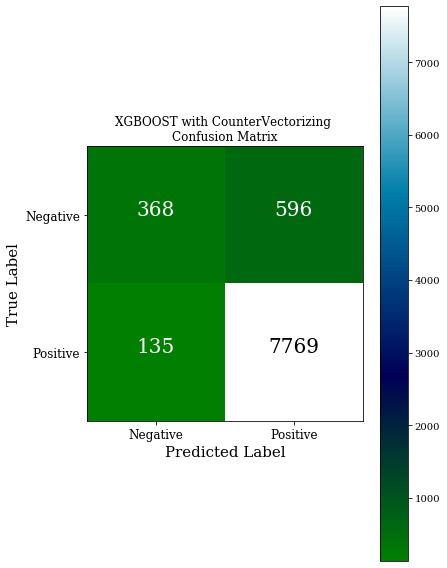

In [103]:
disp_confusion_matrix2(y_pred, "XGBOOST")

In [104]:
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [105]:
clf_eval_df.insert(2, "Vectorizer", ['TF-IDF', 'TF-IDF', 'TF-IDF', 'TF-IDF','TF-IDF','TF-IDF','CountVec','CountVec','CountVec','CountVec','CountVec','CountVec'], True)
clf_eval_df

,model,resample,Vectorizer,precision,recall,f1-score,AUC-ROC
0,Logistic Regression,actual,TF-IDF,0.973151,0.866150,0.916538,0.922686
1,Logistic Regression,smote,TF-IDF,0.961143,0.902377,0.930833,0.910461
2,Random Forest,actual,TF-IDF,0.904745,0.998475,0.949302,0.876613
3,Random Forest,smote,TF-IDF,0.923329,0.967459,0.944879,0.859101
4,XGBOOST,actual,TF-IDF,0.925277,0.986907,0.955099,0.916186
5,XGBOOST,smote,TF-IDF,0.946606,0.930723,0.938598,0.899374
6,Logistic Regression,actual,CountVec,0.974911,0.865258,0.916817,0.923216
7,Logistic Regression,smote,CountVec,0.954167,0.927126,0.940452,0.896424
8,Random Forest,actual,CountVec,0.910508,0.997596,0.952065,0.881446
9,Random Forest,smote,CountVec,0.938894,0.942814,0.940850,0.881524


#### GOING by the F1-score, precision, recall alongwith the AUC score, the following model seems to be the apt one. We are considering the Resampling model after SMOTE because it is more accurate in terms of segregating the positive nad negative values.

###### Model = Logistic Regression
###### Resample = SMOTE
###### Vectorizer = TF-IDF

In [106]:
#to store the LR model 
import pickle
LR_file = open('C:/Users/coldp/OneDrive/Documents/Python/Capstone/LR_model.pkl', 'ab')
pickle.dump(clf_LR1, LR_file)
LR_file.close()

In [107]:
#to store the TFIDF vectorizer
Vectorizer_file = open('C:/Users/coldp/OneDrive/Documents/Python/Capstone/tfidf_vectorizer.pkl', 'ab')
pickle.dump(tvec, Vectorizer_file)
Vectorizer_file.close()

### NOW let's focus on building the recommendation system.

In [108]:
df1.head(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,review,clean_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012,False,5,joshua,1,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017,False,5,dorothy w,1,Good Good flavor. This review was collected as...,good good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017,False,5,dorothy w,1,Good Good flavor.,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016,False,1,rebecca,0,Disappointed I read through the reviews on her...,disappoint read review look buy one couple lub...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016,False,1,walker557,0,Irritation My husband bought this gel for us. ...,irritation husband buy gel us gel cause irrita...


In [109]:
reco_df = df1[['id', 'reviews_rating', 'reviews_username']]
reco_df

,id,reviews_rating,reviews_username
0,AV13O1A8GV-KLJ3akUyj,5,joshua
1,AV14LG0R-jtxr-f38QfS,5,dorothy w
2,AV14LG0R-jtxr-f38QfS,5,dorothy w
3,AV16khLE-jtxr-f38VFn,1,rebecca
4,AV16khLE-jtxr-f38VFn,1,walker557
...,...,...,...
29995,AVpfW8y_LJeJML437ySW,5,laurasnchz
29996,AVpfW8y_LJeJML437ySW,5,scarlepadilla
29997,AVpfW8y_LJeJML437ySW,5,liviasuexo
29998,AVpfW8y_LJeJML437ySW,5,ktreed95


In [110]:
reco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29558 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29558 non-null  object
 1   reviews_rating    29558 non-null  int64 
 2   reviews_username  29558 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [111]:
id_count=reco_df['id'].value_counts()
user_count=reco_df['reviews_username'].value_counts()
user_count

byamazon customer       41
mike                    41
chris                   31
rick                    15
sandy                   15
                        ..
vijsinha                 1
byspoor                  1
minnie01                 1
n1ck                     1
happybestbuycustomer     1
Name: reviews_username, Length: 24624, dtype: int64

In [112]:
print(len(user_count[user_count>=1].index))
len(user_count[user_count>=2].index)

24624


3582

#### Ideally for recommendation engine it would make sense to consider user profiles who have more than one review as it would help us in capturing their preferences better. But if we take that dataset, the number comes down from 24624 to 3582, hence we can continue with the current dataset.

In [113]:
#to divide the dataset into train & test
train, test = train_test_split(reco_df, test_size= 0.3, random_state=40)

In [114]:
print(train.shape)
print(test.shape)

(20690, 3)
(8868, 3)


In [115]:
# creating a pivot table
df_pivot = train.reset_index().pivot_table( index='reviews_username', columns='id',values='reviews_rating').fillna(0)
df_pivot.head(5)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
# copying the train dataset into dummy_train
dummy_train = train.copy()
dummy_train.head(5)

,id,reviews_rating,reviews_username
22798,AVpfov9TLJeJML43A7B0,4,jenjaybaribeau
4174,AVpe9W4D1cnluZ0-avf0,3,dj2020
20564,AVpfJP1C1cnluZ0-e3Xy,5,anas79
23827,AVpfPaoqLJeJML435Xk9,4,matt
8129,AVpf3VOfilAPnD_xjpun,5,logsdonmr


In [117]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)
dummy_train.head(3)

,id,reviews_rating,reviews_username
22798,AVpfov9TLJeJML43A7B0,0,jenjaybaribeau
4174,AVpe9W4D1cnluZ0-avf0,0,dj2020
20564,AVpfJP1C1cnluZ0-e3Xy,0,anas79


In [118]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.reset_index().pivot_table(index='reviews_username', columns='id',values='reviews_rating', aggfunc='mean').fillna(1)
dummy_train.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Using similarity matrix wrt Cosine Similarity

In [119]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.        0.        0.        ... 0.        0.        0.       ]
 [0.        1.        0.        ... 0.        0.9486833 0.       ]
 [0.        0.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.        0.9486833 0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]


In [120]:
user_correlation.shape

(18105, 18105)

In [121]:
### Here, we are not removing the NaN values and calculating the mean only for the products rated by the user

# Create a user-product matrix.
df_pivot = train.reset_index().pivot_table(index='reviews_username', columns='id',values='reviews_rating')
df_pivot.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
# Normalising the review rating of the product for each user around 0 mean

mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T - mean).T
df_subtracted.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [124]:
user_correlation.shape

(18105, 18105)

In [125]:
##USER-USER prediction
##make negative values to zero
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [126]:
# Rating predicted by the user (for products rated as well as not rated)
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 2.5      , ..., 1.4346338, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [127]:
user_predicted_ratings.shape

(18105, 232)

In [128]:
# Since we are interested only in the products not rated by the user, 
# we will ignore the products rated by the user by making it zero. 
user_final_rating = np.multiply(user_predicted_ratings, dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
00sab00,0.0,0.0,2.5,1.218667,0.0,0.0,0.204124,0.0,0.689147,0.0,...,0.319801,0.0,0.0,1.218667,0.0,0.0,0.0,1.434634,0.0,0.0
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
0325home,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [129]:
user_final_rating.nunique()

id
AV13O1A8GV-KLJ3akUyj      8
AV14LG0R-jtxr-f38QfS      1
AV16khLE-jtxr-f38VFn     47
AV1YGDqsGV-KLJ3adc-O    197
AV1YlENIglJLPUi8IHsX     19
                       ... 
AVpfshNsLJeJML43CB8q      1
AVpfthSailAPnD_xg3ON     15
AVpftikC1cnluZ0-p31V     84
AVpftymALJeJML43CZ6y      1
AVpfv4TlilAPnD_xhjNS      7
Length: 232, dtype: int64

In [130]:
# Finding the top recommendation for user 00sab00
user_input = "1234"

In [131]:
user_final_rating.head(20)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
00sab00,0.0,0.0,2.5,1.218667,0.0,0.0,0.204124,0.0,0.689147,0.0,...,0.319801,0.0,0.000000,1.218667,0.0,0.0,0.000000,1.434634,0.0,0.0
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
0325home,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
06stidriver,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
09mommy11,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1.11E+24,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1085,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [132]:
# product_ids = user_final_rating.loc[user_input].sort_values(ascending=False)[:20]
# product_ids.head()

d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

id
AVpf0eb2LJeJML43EVSt    32.743639
AVpfRTh1ilAPnD_xYic2    23.269206
AVpe59io1cnluZ0-ZgDU    20.408417
AVpf2tw1ilAPnD_xjflC    13.867662
AVpe31o71cnluZ0-YrSD     9.830127
Name: 1234, dtype: float64

In [133]:
product_map = pd.DataFrame(df[['id','name']]).drop_duplicates()
product_map.head()

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar


In [134]:
product_map.shape

(271, 2)

In [135]:
products = pd.merge(d, product_map, on='id')
products.head()

,id,1234,name
0,AVpf0eb2LJeJML43EVSt,32.743639,The Resident Evil Collection 5 Discs (blu-Ray)
1,AVpfRTh1ilAPnD_xYic2,23.269206,Planes: Fire Rescue (2 Discs) (includes Digita...
2,AVpe59io1cnluZ0-ZgDU,20.408417,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
3,AVpf2tw1ilAPnD_xjflC,13.867662,Red (special Edition) (dvdvideo)
4,AVpe31o71cnluZ0-YrSD,9.830127,Dark Shadows (includes Digital Copy) (ultravio...


In [136]:
# pickelling the user-user model
user_file = open('C:/Users/coldp/OneDrive/Documents/Python/Capstone/user.pkl', 'ab')
pickle.dump(user_final_rating, user_file)
user_file.close()

### Evaluation - User-User

In [137]:
common_users = test[test.reviews_username.isin(train.reviews_username)]
common_users.shape

(2061, 3)

In [138]:
common_users.tail()

,id,reviews_rating,reviews_username
22843,AVpfov9TLJeJML43A7B0,5,donna
21773,AVpfm8yiLJeJML43AYyu,3,eastrauss
28282,AVpfRTh1ilAPnD_xYic2,5,movieperson825
15106,AVpf4oLxLJeJML43FcxC,5,dw5334
15285,AVpf4oLxLJeJML43FcxC,5,patti94523


In [139]:
# create pivot table for common users
common_users_pivot = common_users.reset_index().pivot_table(index='reviews_username',
                                                            columns='id',
                                                            values='reviews_rating',
                                                            aggfunc='mean')
common_users_pivot.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,...,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrTyiLJeJML43BrSI,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18095,18096,18097,18098,18099,18100,18101,18102,18103,18104
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
user_correlation_df['userId'] = df_subtracted.index
user_correlation_df.set_index('userId',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18095,18096,18097,18098,18099,18100,18101,18102,18103,18104
userId,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
common_users.tail(2)

,id,reviews_rating,reviews_username
15106,AVpf4oLxLJeJML43FcxC,5,dw5334
15285,AVpf4oLxLJeJML43FcxC,5,patti94523


In [143]:
list_name = common_users.reviews_username.tolist()
user_correlation_df.columns = df_subtracted.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]
user_correlation_df_1.shape

(1715, 18105)

In [144]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]
user_correlation_df_3 = user_correlation_df_2.T
user_correlation_df_3.head()

,1234,1234567,123charlie,1943,1witch,4djs,7inthenest,aac06002,aalyah,aaron,...,yellow,yesseniaw22,yohnie1,yshan,yummy,yvonne,zach,zapman,zippy,zmom
userId,,,,,,,,,,,,,,,,,,,,,
1234,1.000000,0.0,0.0,0.288675,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.288675,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
user_correlation_df_3.shape

(1715, 1715)

In [146]:
common_user_predicted_ratings = np.dot(user_correlation_df_3, common_users_pivot.fillna(0))
common_user_predicted_ratings

array([[1.66666667, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [147]:
dummy_test = common_users.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = dummy_test.reset_index().pivot_table(values='reviews_rating', index='reviews_username', columns='id', aggfunc='mean').fillna(0)
dummy_test.shape

(1715, 123)

In [148]:
dummy_test.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,...,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrTyiLJeJML43BrSI,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)
common_user_predicted_ratings.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,...,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrTyiLJeJML43BrSI,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
# Calculating the RMSE for only the products rated by user, normalizing the rating to (1,5) range.

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
scaler.fit(X)
y = (scaler.transform(X))

In [151]:
common_ = common_users.reset_index().pivot_table(values='reviews_rating', index='reviews_username', columns='id', aggfunc='mean')

In [152]:
# Finding total non-NaN value
non_nan = np.count_nonzero(~np.isnan(y))
rmse = (sum(sum((common_ - y )**2))/non_nan)**0.5
print(rmse)

2.4792197910992275


##### Item-Item Similarity

In [153]:
# Item based similarity

df_pivot = train.reset_index().pivot_table(values='reviews_rating', index='reviews_username', columns='id', aggfunc='mean').T
df_pivot.head()

reviews_username,00dog3,00sab00,02dakota,02deuce,0325home,06stidriver,09mommy11,1.11E+24,1085,10ten,...,zozo0o,zpalma,zsarah,zulaa118,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
# Normalising the product rating for each product for using the Adujsted Cosine

mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T - mean).T
df_subtracted.head()

reviews_username,00dog3,00sab00,02dakota,02deuce,0325home,06stidriver,09mommy11,1.11E+24,1085,10ten,...,zozo0o,zpalma,zsarah,zulaa118,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [156]:
item_correlation.shape

(232, 232)

In [157]:
# Replacing the -ve correlation with 0

item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [158]:
# Prediction on item-item
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00620363, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00134969, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00728003, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00107975, 0.        ,
        0.        ]])

In [159]:
item_predicted_ratings.shape

(18105, 232)

In [160]:
dummy_train.shape

(18105, 232)

In [161]:
### Filtering the rating only for the products not rated by the user for recommendation
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.018101,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
00sab00,0.0,0.0,0.0,0.005144,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.016235,0.006204,0.0,0.0
02dakota,0.0,0.0,0.0,0.000484,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.128823,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
02deuce,0.0,0.0,0.0,0.000387,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.103058,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
0325home,0.0,0.0,0.0,0.001604,0.0,0.0,0.002451,0.005258,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.001350,0.0,0.0


In [162]:
### Finding the top recommendation for the user
user_input = '0325home'

In [163]:
items = item_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
items

id
AVpfJP1C1cnluZ0-e3Xy    0.937614
AVpfW8y_LJeJML437ySW    0.022899
AVpf5ujMilAPnD_xkQVi    0.018975
AVpf7I3i1cnluZ0-tnL6    0.013622
AVpfTVkcilAPnD_xZLts    0.012263
Name: 0325home, dtype: float64

In [164]:
items_map = pd.merge(items, product_map, left_on='id',right_on='id',how = 'left')
items_map

,id,0325home,name
0,AVpfJP1C1cnluZ0-e3Xy,0.937614,Clorox Disinfecting Bathroom Cleaner
1,AVpfW8y_LJeJML437ySW,0.022899,L'or233al Paris Elvive Extraordinary Clay Reba...
2,AVpf5ujMilAPnD_xkQVi,0.018975,D-Con Mice Bait Station - 3ct
3,AVpf7I3i1cnluZ0-tnL6,0.013622,Mrs. Meyer's174 Lemon Verbena Laundry Scent Bo...
4,AVpfTVkcilAPnD_xZLts,0.012263,Queen Helene Cocoa Butter Solid


In [165]:
train_new = pd.merge(train,product_map,left_on='id',right_on='id',how = 'left')
train_new[train_new.reviews_username== user_input].head()

,id,reviews_rating,reviews_username,name
6965,AVpf3VOfilAPnD_xjpun,5,0325home,Clorox Disinfecting Wipes Value Pack Scented 1...


#### Evaluation - item-item

In [166]:
common =  test[test.id.isin(train.id)]
common.shape

(8847, 3)

In [167]:
common.head()

,id,reviews_rating,reviews_username
13453,AVpf3VOfilAPnD_xjpun,5,trinelle
25661,AVpfPaoqLJeJML435Xk9,5,itsnatahtoomah
27037,AVpfR5m0LJeJML436K3W,5,john
25010,AVpfPaoqLJeJML435Xk9,5,oaktree
17316,AVpfazX31cnluZ0-kbdl,2,disappointed


In [168]:
common_item_based_matrix = common.reset_index().pivot_table(values='reviews_rating', index='reviews_username', columns='id', aggfunc='mean').T
common_item_based_matrix.shape

(177, 8214)

In [169]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,230,231
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0


In [170]:
item_correlation_df['id'] = df_subtracted.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()
list_name = common.id.tolist()
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

In [171]:
item_correlation_df_3 = item_correlation_df_2.T
item_correlation_df_3.head()

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,...,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003087,0.0,...,0.0,0.000000,0.051429,0.0,0.0,0.0,0.0,0.0,0.002,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.230351,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0


In [172]:
item_correlation_df_3[item_correlation_df_3<0]=0
common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00029024, 0.        , 0.        , ..., 0.00048373, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.01391562,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00374395,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [173]:
common_item_predicted_ratings.shape

(177, 8214)

In [174]:
dummy_test = common.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x >= 1 else 0)

In [175]:
dummy_test = dummy_test.reset_index().pivot_table(values='reviews_rating', index='reviews_username', columns='id', aggfunc='mean').T.fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [176]:
# The products not rated is marked as 0 for evaluation
common_ = common.reset_index().pivot_table(values='reviews_rating', index='reviews_username', columns='id', aggfunc='mean').T

In [177]:
X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
scaler.fit(X)

MinMaxScaler(feature_range=(1, 5))

In [178]:
y = (scaler.transform(X))
y

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [179]:
# Finding total non-NaN value
non_nan = np.count_nonzero(~np.isnan(y))
rmse = (sum(sum((common_ - y )**2))/non_nan)**0.5
print(rmse)

3.548911842531041


### Since the RMSE of User-User (2.47) is much lower than Item-Item (3.54) we will use the 'User-User' model for Recommendation

##### Let's integrate the Sentiment analysis for better recommendation

In [180]:
user_input = "1234"

In [181]:
product_ids = user_final_rating.loc[user_input].sort_values(ascending=False)[:20]
product_ids.head()

id
AVpf0eb2LJeJML43EVSt    32.743639
AVpfRTh1ilAPnD_xYic2    23.269206
AVpe59io1cnluZ0-ZgDU    20.408417
AVpf2tw1ilAPnD_xjflC    13.867662
AVpe31o71cnluZ0-YrSD     9.830127
Name: 1234, dtype: float64

In [182]:
# map the product with its id's
product_map = pd.DataFrame(df[['id','name']]).drop_duplicates()
product_map.head()

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar


In [183]:
#the top 20 product
products = pd.merge(product_ids, product_map, on='id')
products['name'].head(20)

0        The Resident Evil Collection 5 Discs (blu-Ray)
1     Planes: Fire Rescue (2 Discs) (includes Digita...
2     My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
3                      Red (special Edition) (dvdvideo)
4     Dark Shadows (includes Digital Copy) (ultravio...
5                  Clorox Disinfecting Bathroom Cleaner
6     Coty Airspun Face Powder, Translucent Extra Co...
7                    There's Something About Mary (dvd)
8                        Jason Aldean - They Don't Know
9     Windex Original Glass Cleaner Refill 67.6oz (2...
10                    Tostitos Bite Size Tortilla Chips
11                                     Equals (blu-Ray)
12    Avery174 Ready Index Contemporary Table Of Con...
13            Chester's Cheese Flavored Puffcorn Snacks
14                               Hormel Chili, No Beans
15                  100:Complete First Season (blu-Ray)
16    Cheetos Crunchy Flamin' Hot Cheese Flavored Sn...
17            Jolly Time Select Premium Yellow P

In [184]:
sentiment_df=df1[['id', 'clean_text', 'user_sentiment']]
sentiment_df
sentiment_df.to_csv('C:/Users/coldp/OneDrive/Documents/Python/Capstone/sentiment_df.csv')

In [185]:
# Mapping product with product reviews
product_mapping_review = pd.DataFrame(sentiment_df[['id','clean_text','user_sentiment']]).drop_duplicates()
product_review_data =pd.merge(products, product_mapping_review, on='id')
product_review_data

,id,1234,name,clean_text,user_sentiment
0,AVpf0eb2LJeJML43EVSt,32.743639,The Resident Evil Collection 5 Discs (blu-Ray),purchase uv copy not buy order read review buy...,0
1,AVpf0eb2LJeJML43EVSt,32.743639,The Resident Evil Collection 5 Discs (blu-Ray),great movies enjoy movies video game read revi...,1
2,AVpf0eb2LJeJML43EVSt,32.743639,The Resident Evil Collection 5 Discs (blu-Ray),good luck description say uv digital copy rece...,0
3,AVpf0eb2LJeJML43EVSt,32.743639,The Resident Evil Collection 5 Discs (blu-Ray),movie heed digital download movies suck first ...,1
4,AVpf0eb2LJeJML43EVSt,32.743639,The Resident Evil Collection 5 Discs (blu-Ray),great videos together one box great movies one...,1
...,...,...,...,...,...
7480,AVpfluP1ilAPnD_xejxO,2.309401,Stacy's Simply Naked Bagel Chips,love great dip chip hold anything,1
7481,AVpfluP1ilAPnD_xejxO,2.309401,Stacy's Simply Naked Bagel Chips,awesome chip chip awesome little bite garlic b...,1
7482,AVpfluP1ilAPnD_xejxO,2.309401,Stacy's Simply Naked Bagel Chips,love staceys simply naked chip love chip fact ...,1
7483,AVpfluP1ilAPnD_xejxO,2.309401,Stacy's Simply Naked Bagel Chips,stacy pita chip best pita chip around sometime...,1


In [186]:
final_text_data = product_review_data['clean_text']
final_sentiment = product_review_data['user_sentiment']

In [187]:
tfidf_features = tvec.transform(final_text_data)

In [188]:
#We can use the model with Logistic Regression post smote here to predict
product_review_data['predicted_sentiment']=clf_LR1.predict(tfidf_features)

In [189]:
# print the classification report 
print(classification_report(product_review_data['user_sentiment'], product_review_data['predicted_sentiment']))

              precision    recall  f1-score   support

           0       0.61      0.88      0.72       760
           1       0.99      0.94      0.96      6725

    accuracy                           0.93      7485
   macro avg       0.80      0.91      0.84      7485
weighted avg       0.95      0.93      0.94      7485



In [190]:
product_review_data.head()

,id,1234,name,clean_text,user_sentiment,predicted_sentiment
0,AVpf0eb2LJeJML43EVSt,32.743639,The Resident Evil Collection 5 Discs (blu-Ray),purchase uv copy not buy order read review buy...,0,0
1,AVpf0eb2LJeJML43EVSt,32.743639,The Resident Evil Collection 5 Discs (blu-Ray),great movies enjoy movies video game read revi...,1,1
2,AVpf0eb2LJeJML43EVSt,32.743639,The Resident Evil Collection 5 Discs (blu-Ray),good luck description say uv digital copy rece...,0,0
3,AVpf0eb2LJeJML43EVSt,32.743639,The Resident Evil Collection 5 Discs (blu-Ray),movie heed digital download movies suck first ...,1,1
4,AVpf0eb2LJeJML43EVSt,32.743639,The Resident Evil Collection 5 Discs (blu-Ray),great videos together one box great movies one...,1,1


In [191]:
product_pivot = product_review_data.reset_index().pivot_table(values='predicted_sentiment', index='name')
product_pivot.sort_values(by='predicted_sentiment',inplace= True, ascending= False)
product_pivot.head()

,predicted_sentiment
name,
"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",0.941176
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),0.938531
Red (special Edition) (dvdvideo),0.932936
Jolly Time Select Premium Yellow Pop Corn,0.925926
100:Complete First Season (blu-Ray),0.905109
